<a href="https://colab.research.google.com/github/adhiraj4ai/Machine-Learning/blob/main/Computer%20Vision/Pytorch/lenet_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing LeNet using Pytorch from Scratch


## Introduction to LeNet
* Earliest but ground breaking model proposed by Yann Lecun and others in 1998 in their paper Gradient Based Learning Applied to Document Recoginition.
* LeNet has five layers consisting of layers of convolutional encoder block and dense block of fully connected layers.
* Convolutional block consists of convolutional layer, a sigmoid function and a subsequent average pooling operation.
* Lenet's dense block consisted of three fully connected layers with sigmoid function for activation except for the last one.

## Import required Libraries

In [ ]:
# Import all libraries
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Resize, Compose
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

from matplotlib import pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


## Load Dataset

In [ ]:
# Load the train dataset
train_dataset = datasets.MNIST(
    root='../data',
    train = True,
    transform= Compose([
        ToTensor(),
    ]),
    download=True
)

# Load the test dataset
test_dataset = datasets.MNIST(
    root='../data',
    train=False,
    transform=Compose([
        ToTensor(),
    ]),
    download=True
)

In [ ]:
# Define variables required for training
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 15
NUM_CLASSES = 10
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)

# Check and assign if device has GPU
DEVICE = torch.device(
    'cuda' if torch.cuda.is_available() else 'cpu'
)
print(DEVICE)

cuda


In [ ]:
# Create training data loader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size= BATCH_SIZE,
    shuffle= True
)

# Create test data loader
test_loader = DataLoader(
    dataset= test_dataset,
    batch_size= BATCH_SIZE,
    shuffle= True
)

## Explore Dataset

In [ ]:
# Explore the shpae of the batch for images and labels
for images, labels in train_loader:
    print('Image dimension:', images.shape)
    print('Label dimension:', labels.shape)
    break

Image dimension: torch.Size([64, 1, 28, 28])
Label dimension: torch.Size([64])


In [ ]:
# Explore the data arrrangement in train_dataset
print(train_dataset[2])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

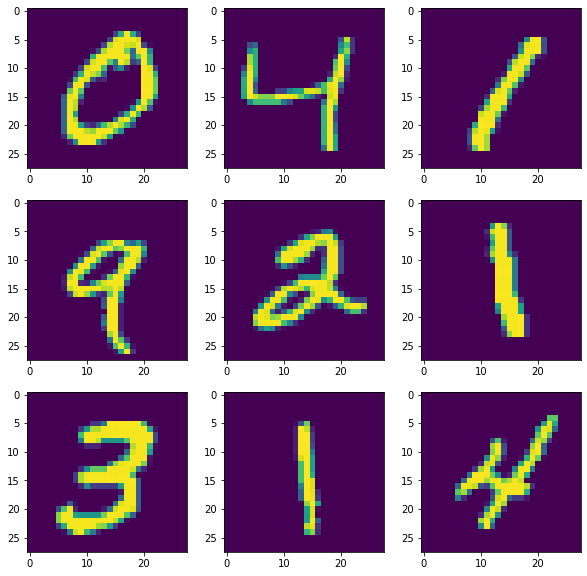

In [ ]:
# Plot 10 images from training dataset
figure = plt.figure(figsize = (10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = train_dataset[i]
    figure.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())

plt.show()

## Build Model

In [ ]:
# Build LeNet Model
class LeNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size= 2, stride=2),
            nn.Conv2d(6, 16, kernel_size= 5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(400, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, num_classes)
        )
    
    def forward(self, X):
        logits = self.net(X)

        return logits

In [ ]:
# Move the model to GPU
lenet_model = LeNet(NUM_CLASSES).to(DEVICE)

# Print the model summary
from torchsummary import summary
summary(lenet_model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
           Sigmoid-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
          Sigmoid-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

## Training and Evaluation

In [ ]:
# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.Adam(lenet_model.parameters(), lr = LEARNING_RATE)

In [ ]:
# Define train function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader)
    
    for batch, (X, y) in enumerate(train_loader):
        # Move X, y to the device i.e. GPU if exists
        X = X.to(DEVICE)
        y = y.to(DEVICE)

        # Predict for X
        pred = model(X)

        # Compute loss
        loss = loss_fn(pred, y)

        # Backpropagate the error
        optimizer.zero_grad()       # to reset the gradient
        loss.backward()

        # Update Model Parameters
        optimizer.step()            

        if batch % 200 == 0:
            loss, current = loss.item(), batch
            print(f"Training loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
# Define train function
def test(dataloader, model, loss_fn):
    num_batches, size = len(dataloader), len(dataloader.dataset)
    test_loss, correct = 0, 0
    num_examples = 0
    
    with torch.no_grad():
        for (X, y) in test_loader:
            # Move X, y to the device i.e. GPU if exists
            X = X.to(DEVICE)
            y = y.to(DEVICE)

            # Predict for X
            pred = model(X)
            # Compute loss
            test_loss += loss_fn(pred, y).item()
            # num_examples += y.sizey.size(0)
            correct += (pred.argmax(1) == y).sum().item()
        
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# Execute the training
for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    print("--------------------------")
    train(train_loader, lenet_model, loss_fn, optimizer)
    test(test_loader, lenet_model, loss_fn)

Epoch 1
--------------------------
Training loss: 2.338743  [    0/  938]
Training loss: 2.129366  [  200/  938]
Training loss: 0.828645  [  400/  938]
Training loss: 0.609109  [  600/  938]
Training loss: 0.285935  [  800/  938]
Test Error: 
 Accuracy: 90.3%, Avg loss: 0.338414 

Epoch 2
--------------------------
Training loss: 0.406498  [    0/  938]
Training loss: 0.344672  [  200/  938]
Training loss: 0.188355  [  400/  938]
Training loss: 0.216724  [  600/  938]
Training loss: 0.369100  [  800/  938]
Test Error: 
 Accuracy: 94.1%, Avg loss: 0.193502 

Epoch 3
--------------------------
Training loss: 0.252916  [    0/  938]
Training loss: 0.120034  [  200/  938]
Training loss: 0.182233  [  400/  938]
Training loss: 0.047188  [  600/  938]
Training loss: 0.075430  [  800/  938]
Test Error: 
 Accuracy: 95.4%, Avg loss: 0.144130 

Epoch 4
--------------------------
Training loss: 0.364660  [    0/  938]
Training loss: 0.055487  [  200/  938]
Training loss: 0.100807  [  400/  938]
Tr

**Interpretation:**

The base LeNet model produces the accuracy of 98.6% which is very good result with such a basic model on MNIST digit recoginiton

## Modified LeNet
We now will make suttle changes in the model and create different version of model to see if the accuracy improves with those changes.

### Replace Sigmoid by RELU
First we replace `Sigmoid` activation function with `ReLU` activation function and run our model.

In [ ]:
# Build LeNet Model by replacing Sigmoid with ReLU
class LeNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride = 2),

            nn.LazyConv2d(16, kernel_size= 5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride = 2),
            
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
    
    def forward(self, x):
        logits = self.net(x)

        return logits

In [ ]:
# Move the model to GPU
lenet_model2 = LeNet(NUM_CLASSES).to(DEVICE)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.Adam(lenet_model2.parameters(), lr = LEARNING_RATE)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Execute the training
for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    print("--------------------------")
    train(train_loader, lenet_model2, loss_fn, optimizer)
    test(test_loader, lenet_model2, loss_fn)

Epoch 1
--------------------------
Training loss: 2.305207  [    0/  938]
Training loss: 0.618519  [  200/  938]
Training loss: 0.225499  [  400/  938]
Training loss: 0.112769  [  600/  938]
Training loss: 0.175629  [  800/  938]
Test Error: 
 Accuracy: 96.2%, Avg loss: 0.119375 

Epoch 2
--------------------------
Training loss: 0.078671  [    0/  938]
Training loss: 0.035422  [  200/  938]
Training loss: 0.038941  [  400/  938]
Training loss: 0.083587  [  600/  938]
Training loss: 0.016197  [  800/  938]
Test Error: 
 Accuracy: 97.8%, Avg loss: 0.065709 

Epoch 3
--------------------------
Training loss: 0.244407  [    0/  938]
Training loss: 0.055963  [  200/  938]
Training loss: 0.019988  [  400/  938]
Training loss: 0.134522  [  600/  938]
Training loss: 0.028622  [  800/  938]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.047747 

Epoch 4
--------------------------
Training loss: 0.057976  [    0/  938]
Training loss: 0.044037  [  200/  938]
Training loss: 0.082574  [  400/  938]
Tr

**Interpretation:**

The use of ReLU function slightly improved the accuracy. We now achieved 98.8% accuracy which is expected as ReLU works better compared to Sigmoid for hidden layer activation.

### Replace AvgPool by MaxPool
Next, we replace Average pooling by Max Pooling as average pooling smooths out the image and hence the sharp feature are lost. On other hand, max pooling selects the brighter pixel from the image.

In [ ]:
# Build LeNet Model with Max Pooling
class LeNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride=2),
            
            nn.LazyConv2d(16, kernel_size= 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
    
    def forward(self, x):
        logits = self.net(x)

        return logits

# Move the model to GPU
lenet_model3 = LeNet(NUM_CLASSES).to(DEVICE)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.Adam(lenet_model3.parameters(), lr = LEARNING_RATE)

# Execute the training
for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    print("--------------------------")
    train(train_loader, lenet_model3, loss_fn, optimizer)
    test(test_loader, lenet_model3, loss_fn)

Epoch 1
--------------------------
Training loss: 2.300756  [    0/  938]
Training loss: 0.173743  [  200/  938]
Training loss: 0.144055  [  400/  938]
Training loss: 0.064998  [  600/  938]
Training loss: 0.074105  [  800/  938]
Test Error: 
 Accuracy: 97.4%, Avg loss: 0.080852 

Epoch 2
--------------------------
Training loss: 0.038771  [    0/  938]
Training loss: 0.022854  [  200/  938]
Training loss: 0.050137  [  400/  938]
Training loss: 0.133533  [  600/  938]
Training loss: 0.091254  [  800/  938]
Test Error: 
 Accuracy: 98.4%, Avg loss: 0.045588 

Epoch 3
--------------------------
Training loss: 0.041345  [    0/  938]
Training loss: 0.030700  [  200/  938]
Training loss: 0.101431  [  400/  938]
Training loss: 0.004586  [  600/  938]
Training loss: 0.011300  [  800/  938]
Test Error: 
 Accuracy: 98.2%, Avg loss: 0.050589 

Epoch 4
--------------------------
Training loss: 0.035806  [    0/  938]
Training loss: 0.017866  [  200/  938]
Training loss: 0.006765  [  400/  938]
Tr

**Interpretation**:
With the replacement of AvgPool by MaxPool, we notices the improvement of 0.01% in the accuracy. This is very small but noticeable improvement.


### Batch Normalize the layer


In [ ]:
# Build LeNet Model with Batch Normalization
class LeNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, stride=1, padding=2),
            nn.LazyBatchNorm2d(),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride=2),
            
            nn.LazyConv2d(16, kernel_size= 5),
            nn.LazyBatchNorm2d(),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
    
    def forward(self, x):
        logits = self.net(x)

        return logits

# Move the model to GPU
lenet_model4 = LeNet(NUM_CLASSES).to(DEVICE)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define Optimizer
optimizer = torch.optim.Adam(lenet_model4.parameters(), lr = LEARNING_RATE)

# Execute the training
for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    print("--------------------------")
    train(train_loader, lenet_model4, loss_fn, optimizer)
    test(test_loader, lenet_model4, loss_fn)

Epoch 1
--------------------------
Training loss: 2.341679  [    0/  938]
Training loss: 0.140223  [  200/  938]
Training loss: 0.039875  [  400/  938]
Training loss: 0.018332  [  600/  938]
Training loss: 0.105512  [  800/  938]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.063741 

Epoch 2
--------------------------
Training loss: 0.066084  [    0/  938]
Training loss: 0.031427  [  200/  938]
Training loss: 0.009188  [  400/  938]
Training loss: 0.199526  [  600/  938]
Training loss: 0.050924  [  800/  938]
Test Error: 
 Accuracy: 98.3%, Avg loss: 0.055864 

Epoch 3
--------------------------
Training loss: 0.097901  [    0/  938]
Training loss: 0.044612  [  200/  938]
Training loss: 0.064392  [  400/  938]
Training loss: 0.025873  [  600/  938]
Training loss: 0.040664  [  800/  938]
Test Error: 
 Accuracy: 98.8%, Avg loss: 0.036235 

Epoch 4
--------------------------
Training loss: 0.002231  [    0/  938]
Training loss: 0.042320  [  200/  938]
Training loss: 0.009110  [  400/  938]
Tr

**Interpretation**
There is very small improvement noticed in the performance with the introduction of batch normalization in the network.


## Conclusion
Finally, we can conclude from above experimentation that the LeNet performance improves by
1. replacing the sigmoid by ReLU function.
2. replacing the AvgPool (Average Pooling) by MaxPool (Max pooling)
3. introducing the batchnormalization